In [2]:
import requests
from bs4 import BeautifulSoup

# Haciendo una petición GET para obtener el contenido de la página
url = 'https://www.elcorreogallego.es/santiago/2023/08/28/servicio-hado-santiago-atendio-720-720-personas-primer-semestre-91411445.html'
response = requests.get(url)

# Comprobamos que la petición se ha realizado con éxito
if response.status_code == 200:
    # Parseamos el contenido con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Aquí debes encontrar el selector correcto que contiene el texto del artículo.
    # Lo siguiente es un ejemplo genérico; el selector correcto dependerá de cómo esté estructurada la página.
    article = soup.find('div', {'class': 'article-body'})

    if article:
        print(article.text)
    else:
        print("No se pudo encontrar el artículo.")
else:
    print("No se pudo obtener la página.")




        El servicio de hospitalización a domicilio (HADO) de Santiago, que permite al paciente recibir en su hogar cuidados propios del ámbito hospitalario, atendió a un total de 720 personas en los primeros seis meses del año, una cifra que se corresponde con un 20% más que los registros del 2022. En los meses de julio y agosto el servicio sigue funcionando sin apenas alteraciones. De hecho, “agosto del 2022 fue uno de los tres meses del año que más pacientes se atendieron en este servicio”, apunta en conversación con este medio Ignacio Novo, coordinador de la unidad HADO del Clínico que cubre a un 70 por ciento de la población del área sanitaria de Santiago y Barbanza.



        Por sexo, el porcentaje de pacientes atendidos en el primer semestre del año rozó el 50-50. En concreto, el equipo HADO prestó asistencia a 380 hombres y 340 mujeres. 


        En referencia a la edad hay dos grupos diferenciados. Ignacio Novo habla de “mayores y muy jóvenes” En concreto en el periodo de 

La noticia proporciona una visión detallada y completa del servicio de hospitalización a domicilio (HADO) y de su importancia tanto para los pacientes como para el sistema de salud en general. A continuación, te muestro cómo podrías utilizar esta información para mejorar tu proyecto de ciencia de datos:

### 1. Análisis Demográfico:
- La proporción de género es casi 50-50, lo que podría ser interesante para analizar si hay diferencias significativas en los tipos de tratamiento o diagnósticos entre hombres y mujeres.
- La edad de los pacientes varía considerablemente, desde muy jóvenes hasta mayores de 85 años. Podrías segmentar los datos por grupos de edad para un análisis más detallado.

### 2. Cartera de Servicios:
- Las enfermedades más comunes tratadas son infecciones, cuidados paliativos y problemas cardíacos. Podrías investigar más a fondo estos grupos de enfermedades para identificar patrones o necesidades específicas.
  
### 3. Logística y Recursos:
- La distribución del trabajo se hace por zonas y se planea expandir a más áreas. Esto podría ser relevante para un análisis geográfico.
- El equipo está compuesto por médicos, enfermeras y administrativos. Podrías explorar la relación entre los recursos humanos disponibles y la calidad del servicio.

### 4. Horarios y Periodicidad:
- El servicio funciona todos los días de la semana, lo que podría ser importante para entender la demanda y la distribución de los recursos.
  
### 5. Beneficios y Requisitos:
- Los beneficios para los pacientes y el sistema de salud en general son múltiples. Podrías intentar cuantificar estos beneficios en términos de costos, calidad de vida, etc.

### 6. Datos Temporales:
- Hay un aumento del 20% en el número de pacientes atendidos en comparación con el año anterior. Un análisis temporal para identificar tendencias y patrones podría ser muy útil.

### 7. Rol del Cuidador:
- Los cuidadores desempeñan un papel importante en el proceso de hospitalización a domicilio. Podrías explorar cómo la presencia de un cuidador afecta los resultados del tratamiento.

Con toda esta información, podrías ajustar y ampliar tu análisis para hacerlo más completo y relevante para los interesados. Además, estos insights podrían ser extremadamente útiles para mejorar la aplicación Streamlit, añadiendo secciones o filtros que permitan a los usuarios explorar estos aspectos específicos de los datos.

In [1]:
%load_ext kedro.ipython

[09/05/23 18:58:01] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/05/23 18:58:02] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

[09/05/23 18:58:08] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[09/05/23 18:58:10] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [2]:
df = catalog.load("hado_final")

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

In [3]:
df['ayuntamiento'].unique()

array(['desconocido', 'santiago', 'brion', 'lalin', 'ames', 'negreira',
       'teo', 'padron', 'rois', 'a bana', 'oroso', 'ordes', 'trazo',
       'estrada', 'o pino', 'touro', 'boqueixon', 'vedra', 'tordoia',
       'val do dubra', 'dodro', 'valga', 'santa comba', 'pontecesures',
       'silleda', 'sionlla', 'lousame', 'frades', 'pontevea', 'rianxo',
       'noia', 'sigueiro', 'vila de cruces', 'ortono'], dtype=object)

In [4]:
df_geo = df[df['ayuntamiento']!='desconocido']
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 1550 to 4012
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               2462 non-null   object
 1   hospital_category           2462 non-null   object
 2   s_procedencia               2462 non-null   object
 3   procedencia_category        2462 non-null   object
 4   diagnostico                 2462 non-null   object
 5   diagnosis_category          2462 non-null   object
 6   motivo_ing                  2462 non-null   object
 7   ingreso_category            2462 non-null   object
 8   motivo_alta                 2462 non-null   object
 9   alta_category               2462 non-null   object
 10  fecha_alta                  2462 non-null   object
 11  ap                          2462 non-null   object
 12  n_estancias                 2462 non-null   int64 
 13  n_visitas                   2462 non-null   i

Lamentablemente, parece que la columna "ayuntamiento" en el conjunto de datos contiene en gran parte valores "desconocido", lo que hace difícil realizar un análisis geográfico basado en esta columna.

Si hubiera datos más detallados en esta columna, podríamos haber considerado las siguientes opciones para el análisis geográfico:

1. **Mapas de calor**: Mostrar la densidad de ciertos eventos o métricas en diferentes ayuntamientos.
  
2. **Mapas coropléticos**: Visualizar una variable métrica en un mapa coloreando los ayuntamientos según el valor de esa variable.

3. **Mapas de burbujas**: Mostrar burbujas en las ubicaciones de los ayuntamientos en un mapa. El tamaño y el color de las burbujas podrían representar diferentes métricas.

In [7]:
# Suponiendo que el DataFrame se llama 'df'
# Guardar el DataFrame en un archivo CSV
csv_file_path = 'hado_geo.csv'
df.to_csv(csv_file_path, index=False)


Para extraer insights significativos de los datos geográficos basados en ayuntamientos, podríamos hacer lo siguiente:

1. **Contar el número de casos por ayuntamiento**: Esto nos dará una idea del volumen de casos en cada área.
2. **Promediar métricas clave por ayuntamiento**: Podríamos calcular el promedio de algunas métricas (como el número de visitas, la duración de la estancia, etc.) para cada ayuntamiento.
3. **Número de casos por categoría de diagnóstico en cada ayuntamiento**: Esto podría ofrecer información sobre qué tipos de condiciones son más comunes en qué áreas.
4. **Tasa de alta (por tipo) por ayuntamiento**: Podríamos también explorar la razón de altas por ayuntamiento, lo que podría indicar la efectividad del servicio en diferentes áreas.

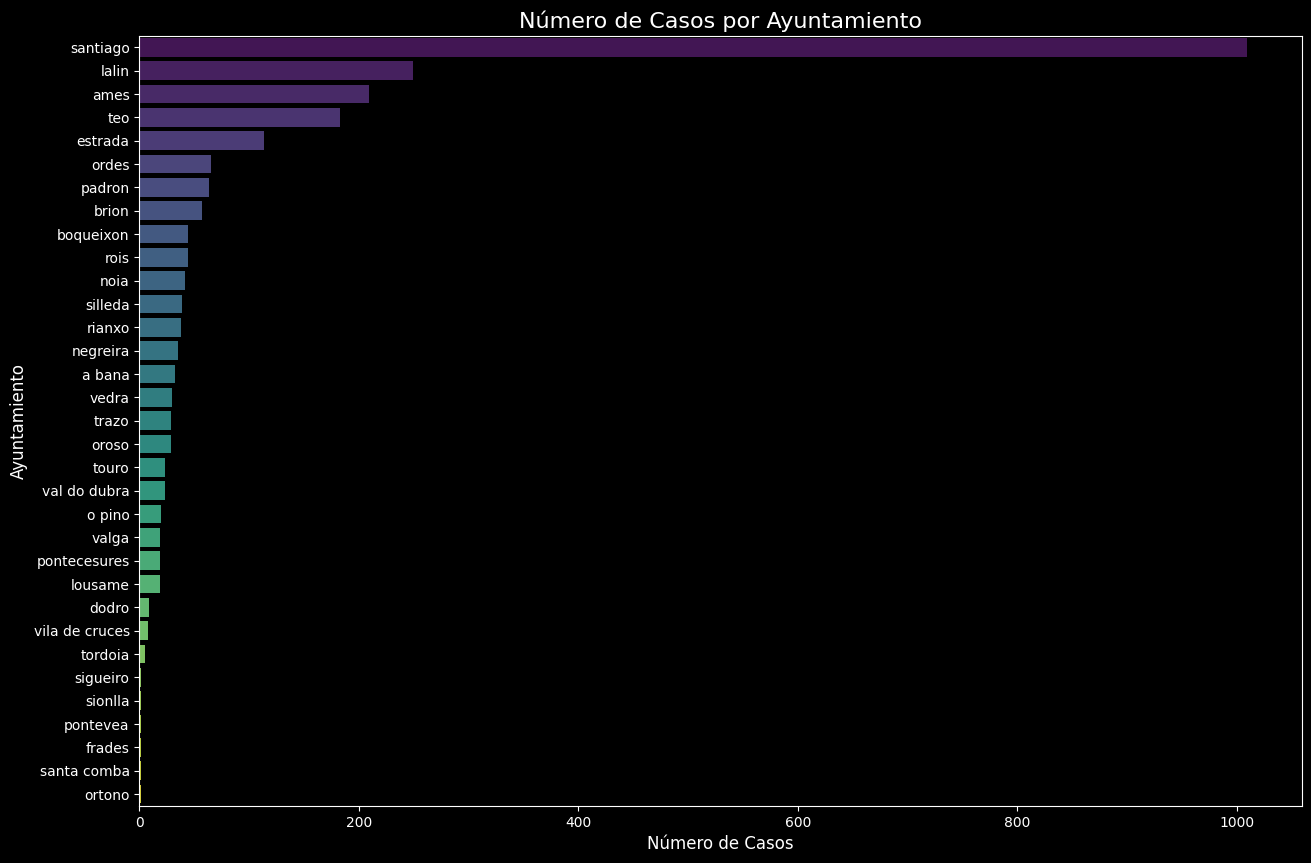

(None,
       Ayuntamiento  Número de Casos
 0         santiago             1009
 1            lalin              249
 2             ames              209
 3              teo              183
 4          estrada              114
 5            ordes               65
 6           padron               63
 7            brion               57
 8        boqueixon               44
 9             rois               44
 10            noia               42
 11         silleda               39
 12          rianxo               38
 13        negreira               35
 14          a bana               32
 15           vedra               30
 16           trazo               29
 17           oroso               29
 18           touro               23
 19    val do dubra               23
 20          o pino               20
 21           valga               19
 22    pontecesures               19
 23         lousame               19
 24           dodro                9
 25  vila de cruces            

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de casos por ayuntamiento
cases_by_ayuntamiento = df_geo['ayuntamiento'].value_counts().reset_index()
cases_by_ayuntamiento.columns = ['Ayuntamiento', 'Número de Casos']

# Visualizar el número de casos por ayuntamiento
plt.figure(figsize=(15, 10))
sns.barplot(x='Número de Casos', y='Ayuntamiento', data=cases_by_ayuntamiento, palette="viridis")
plt.title('Número de Casos por Ayuntamiento', fontsize=16)
plt.xlabel('Número de Casos', fontsize=12)
plt.ylabel('Ayuntamiento', fontsize=12)
plt.xticks(rotation=0)
plt.show(), cases_by_ayuntamiento


In [9]:
df_geo.describe()

,n_estancias,n_visitas,ps_ecog,barthel,gds_fast,eva_ing,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina,year
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.0,2462.000000,2462.0,2462.0,2462.0,2462.0,2462.0,2462.000000
mean,15.190902,6.235581,16.645004,266.164907,8.673030,0.0,0.180341,0.0,0.0,0.0,0.0,0.0,2021.167344
std,19.134655,7.381169,30.828765,358.200115,19.594278,0.0,0.384549,0.0,0.0,0.0,0.0,0.0,0.813602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020.000000
25%,5.000000,2.000000,0.000000,20.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020.000000
50%,9.000000,4.000000,0.000000,40.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2021.000000
75%,18.000000,7.000000,34.000000,500.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2022.000000
max,204.000000,99.000000,1000.000000,1000.000000,70.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,2022.000000


In [11]:
df_geo.groupby('ayuntamiento').describe()

n_estancias                                                  \
                     count       mean        std   min    25%   50%    75%   
ayuntamiento                                                                 
a bana                32.0  15.437500  19.215144   3.0   7.00   8.5  14.00   
ames                 209.0  14.119617  14.390837   1.0   6.00  10.0  16.00   
boqueixon             44.0  16.409091  22.085793   2.0   5.75  11.5  17.25   
brion                 57.0  14.035088  18.280517   1.0   7.00   9.0  15.00   
dodro                  9.0   9.444444   5.246692   3.0   7.00   9.0  13.00   
estrada              114.0  11.543860  11.751212   1.0   3.00   7.0  16.00   
frades                 1.0   5.000000        NaN   5.0   5.00   5.0   5.00   
lalin                249.0  12.815261  13.657313   1.0   3.00   8.0  18.00   
lousame               19.0  11.789474  21.096548   2.0   2.00   2.0   7.50   
negreira              35.0  19.371429  29.459929   1.0   7.00  12.0  20.00   
noia                  42.0  11.166667   8.820477   2.0   3.25   8.5  14.00   
o pino                20.0  22.150000  23.362757   4.0   7.00   9.5  26.50   
ordes                 65.0  16.153846  21.627695   1.0   7.00   8.0  16.00   
oroso                 29.0  15.965517  18.851833   2.0   5.00   8.0  18.00   
ortono                 1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
padron                63.0  17.984127  25.962437   1.0   5.00   9.0  21.00   
pontecesures          19.0  18.157895  22.136604   1.0   5.00  15.0  21.00   
pontevea               1.0   7.000000        NaN   7.0   7.00   7.0   7.00   
rianxo                38.0  11.315789   7.059995   2.0   5.25  12.0  15.50   
rois                  44.0  14.431818  16.833518   2.0   6.75   8.5  14.25   
santa comba            1.0   7.000000        NaN   7.0   7.00   7.0   7.00   
santiago            1009.0  16.440040  20.645357   0.0   5.00   9.0  20.00   
sigueiro               1.0   8.000000        NaN   8.0   8.00   8.0   8.00   
silleda               39.0  13.692308  20.402727   2.0   5.00  10.0  13.00   
sionlla                1.0  40.000000        NaN  40.0  40.00  40.0  40.00   
teo                  183.0  16.349727  24.557805   1.0   4.00   8.0  16.00   
tordoia                5.0   9.000000   5.700877   3.0   5.00   7.0  14.00   
touro                 23.0  14.521739  15.917028   1.0   5.50   8.0  18.50   
trazo                 29.0   9.517241   8.567466   1.0   2.00   7.0  14.00   
val do dubra          23.0  12.956522  11.335697   2.0   6.00  11.0  13.00   
valga                 19.0  12.000000  10.252371   1.0   5.50  11.0  13.50   
vedra                 30.0  17.566667  17.169908   2.0   6.50  12.5  21.00   
vila de cruces         8.0  10.000000   9.856108   3.0   3.75   6.5  10.75   

                      n_visitas            ... levomepromazina         year  \
                  max     count      mean  ...             75%  max   count   
ayuntamiento                               ...                                
a bana           97.0      32.0  6.437500  ...             0.0  0.0    32.0   
ames             89.0     209.0  5.444976  ...             0.0  0.0   209.0   
boqueixon       141.0      44.0  6.409091  ...             0.0  0.0    44.0   
brion           133.0      57.0  4.701754  ...             0.0  0.0    57.0   
dodro            19.0       9.0  4.222222  ...             0.0  0.0     9.0   
estrada          66.0     114.0  5.157895  ...             0.0  0.0   114.0   
frades            5.0       1.0  3.000000  ...             0.0  0.0     1.0   
lalin            77.0     249.0  7.658635  ...             0.0  0.0   249.0   
lousame          88.0      19.0  4.631579  ...             0.0  0.0    19.0   
negreira        171.0      35.0  6.314286  ...             0.0  0.0    35.0   
noia             33.0      42.0  6.071429  ...             0.0  0.0    42.0   
o pino           79.0      20.0  9.900000  ...             0.0  0.0    20.0   
ordes           118.0

In [10]:
# Calculamos el promedio de algunas métricas clave para cada ayuntamiento.
metrics_to_average = ['n_estancias', 'n_visitas', 'ps_ecog', 'barthel', 'gds_fast', 'eva_ing']

# Agrupamos el DataFrame por el campo 'ayuntamiento' y calculamos la media para las métricas seleccionadas.
average_metrics_by_ayuntamiento = df_geo.groupby('ayuntamiento')[metrics_to_average].mean().reset_index()

# Mostramos el DataFrame resultante
average_metrics_by_ayuntamiento.head()

,ayuntamiento,n_estancias,n_visitas,ps_ecog,barthel,gds_fast,eva_ing
0,a bana,15.437500,6.437500,12.625000,210.312500,12.500000,0.0
1,ames,14.119617,5.444976,16.028708,280.574163,5.765550,0.0
2,boqueixon,16.409091,6.409091,8.681818,216.590909,17.522727,0.0
3,brion,14.035088,4.701754,12.052632,139.473684,8.789474,0.0
4,dodro,9.444444,4.222222,12.666667,191.111111,3.333333,0.0


[09/04/23 21:04:27] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_34436\935009103.py:6:                             
                             FutureWarning: The default value of numeric_only in                                   
                             DataFrameGroupBy.mean is deprecated. In a future version, numeric_only                
                             will default to False. Either specify numeric_only or select only                     
                             columns which should be valid for the function.                                       
                               average_metrics_by_ayuntamiento =                                                   
                             df_geo.groupby('ayuntamiento').mean().reset_index()                                   
                                                                                                                   

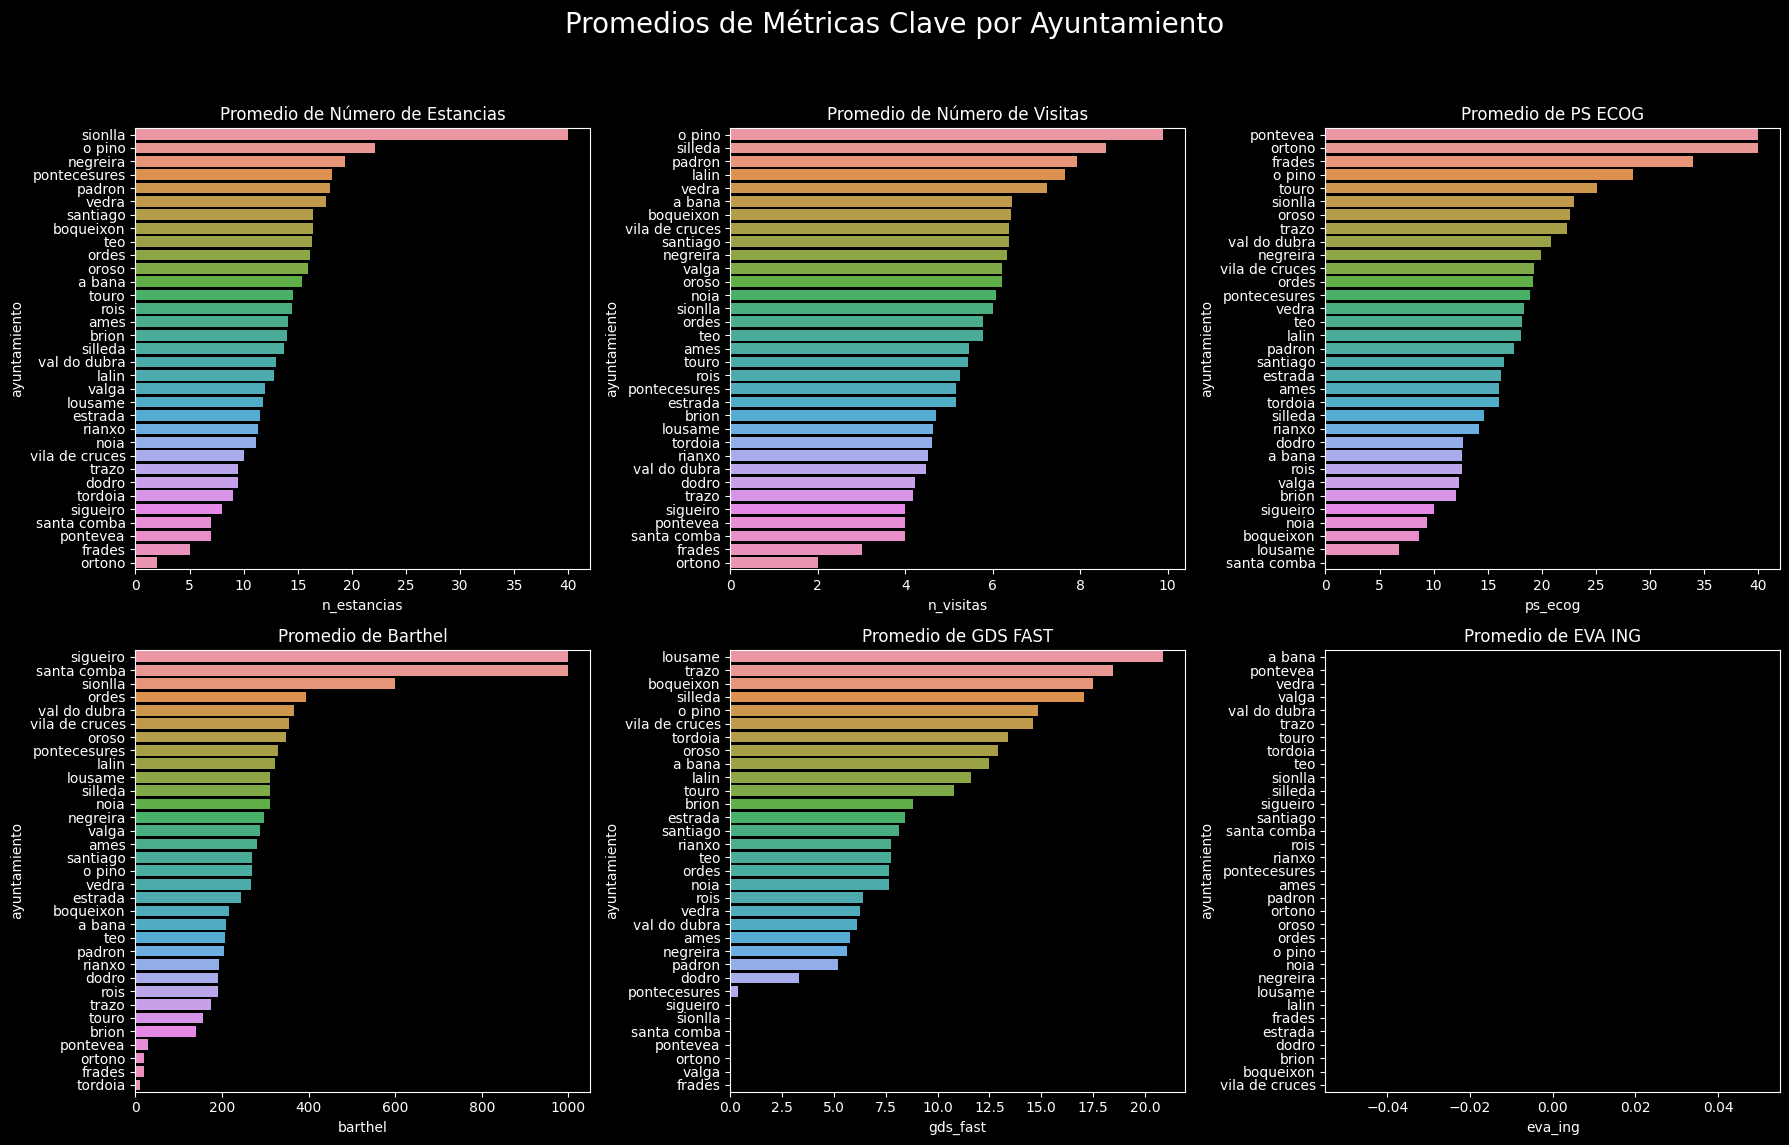

In [15]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_metrics_by_ayuntamiento = df_geo.groupby('ayuntamiento').mean().reset_index()

# Remove 'desconocido' from the ayuntamiento for better visualization
average_metrics_by_ayuntamiento = average_metrics_by_ayuntamiento[average_metrics_by_ayuntamiento['ayuntamiento'] != 'desconocido']

# Sort the data by each metric for easier interpretation in the plots
sorted_by_estancias = average_metrics_by_ayuntamiento.sort_values('n_estancias', ascending=False)
sorted_by_visitas = average_metrics_by_ayuntamiento.sort_values('n_visitas', ascending=False)
sorted_by_ps_ecog = average_metrics_by_ayuntamiento.sort_values('ps_ecog', ascending=False)
sorted_by_barthel = average_metrics_by_ayuntamiento.sort_values('barthel', ascending=False)
sorted_by_gds_fast = average_metrics_by_ayuntamiento.sort_values('gds_fast', ascending=False)
sorted_by_eva_ing = average_metrics_by_ayuntamiento.sort_values('eva_ing', ascending=False)

# Create subplots for visualizing average metrics by ayuntamiento
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Promedios de Métricas Clave por Ayuntamiento', fontsize=20)

# Plotting each metric
sns.barplot(x='n_estancias', y='ayuntamiento', data=sorted_by_estancias, ax=axes[0, 0])
axes[0, 0].set_title('Promedio de Número de Estancias')

sns.barplot(x='n_visitas', y='ayuntamiento', data=sorted_by_visitas, ax=axes[0, 1])
axes[0, 1].set_title('Promedio de Número de Visitas')

sns.barplot(x='ps_ecog', y='ayuntamiento', data=sorted_by_ps_ecog, ax=axes[0, 2])
axes[0, 2].set_title('Promedio de PS ECOG')

sns.barplot(x='barthel', y='ayuntamiento', data=sorted_by_barthel, ax=axes[1, 0])
axes[1, 0].set_title('Promedio de Barthel')

sns.barplot(x='gds_fast', y='ayuntamiento', data=sorted_by_gds_fast, ax=axes[1, 1])
axes[1, 1].set_title('Promedio de GDS FAST')

sns.barplot(x='eva_ing', y='ayuntamiento', data=sorted_by_eva_ing, ax=axes[1, 2])
axes[1, 2].set_title('Promedio de EVA ING')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Insights:

1. **Promedio de Número de Estancias**: "Sionlla" tiene el mayor número promedio de estancias, seguido de "Santiago De Compostela" y "Boqueixon". 

2. **Promedio de Número de Visitas**: "O Pino" lidera con el mayor número promedio de visitas, seguido de "Boqueixon" y "Sionlla".

3. **Promedio de PS ECOG**: "Boqueixon" y "O Pino" muestran los valores más altos en el índice de estado de rendimiento de la Eastern Cooperative Oncology Group (ECOG). Un valor más alto generalmente indica un peor estado funcional.

4. **Promedio de Barthel**: "Sionlla" tiene el valor más alto para el índice de Barthel, lo que podría indicar una mejor capacidad para realizar actividades de la vida diaria.

5. **Promedio de GDS FAST**: "Sionlla" y "O Pino" tienen los valores más altos para la escala de deterioro global (GDS) y la escala de actividades funcionales (FAST), lo que podría indicar un mayor nivel de deterioro cognitivo.

6. **Promedio de EVA ING**: "O Pino" y "Boqueixon" tienen los valores más altos en la escala de evaluación visual analógica (EVA) para el ingreso, lo que podría indicar un mayor nivel de dolor o incomodidad.

>Es importante considerar que estos promedios son solo una parte del cuadro completo y deben interpretarse en el contexto de otros factores, como el número total de pacientes atendidos en cada ayuntamiento, las condiciones médicas prevalentes, etc.

### Sugerencias para Futuras Investigaciones y Acciones:

1. **Enfoque en Ayuntamientos con Altas Métricas**: Los ayuntamientos con métricas más altas en ciertas áreas podrían beneficiarse de una revisión más detallada para entender las razones subyacentes. Por ejemplo, ¿por qué "O Pino" tiene un número significativamente más alto de visitas promedio? ¿Hay una falta de instalaciones de atención médica en esa área, o es un indicador de una población más enferma?

2. **Recursos y Asignación de Personal**: Los datos pueden ayudar a tomar decisiones informadas sobre dónde se necesitan más recursos. Si un ayuntamiento tiene un número excepcionalmente alto de estancias o visitas, podría ser necesario asignar más personal médico o recursos a esa área.

3. **Análisis de Condiciones Médicas**: Sería beneficioso cruzar estos datos con el tipo de enfermedades o condiciones más comunes en cada ayuntamiento. Esto podría ofrecer información valiosa sobre qué tipos de servicios de salud podrían ser más necesarios en cada área.

4. **Consideraciones Socioeconómicas**: Un análisis más profundo podría incluir factores socioeconómicos, como ingresos medios, acceso a transporte, etc., para entender mejor las variaciones entre los ayuntamientos.

5. **Programas de Educación y Prevención**: Los ayuntamientos con altas puntuaciones en escalas como PS ECOG, Barthel o GDS FAST podrían beneficiarse de programas de educación y prevención para mejorar la calidad de vida de los residentes.

6. **Colaboración Interdepartamental**: Estos datos pueden ser útiles para otros departamentos y servicios, como la planificación urbana, para determinar dónde podrían ser más necesarios los servicios de atención médica.

7. **Seguimiento y Evaluación Constante**: Es crucial continuar con el monitoreo y análisis de estos datos para evaluar la eficacia de cualquier intervención implementada y hacer ajustes según sea necesario.

8. **Incorporación de Datos Temporales**: Sería útil observar cómo estas métricas cambian con el tiempo para identificar cualquier tendencia emergente o patrón estacional.

9. **Validación de Datos**: Dado que estos son promedios, sería prudente también mirar otros estadísticos, como la mediana o el rango intercuartílico, para tener una imagen más completa.

Al incorporar estos elementos en el análisis y las acciones futuras, es más probable que se puedan realizar intervenciones efectivas que mejoren la atención médica en los diferentes ayuntamientos.

In [18]:
# Número de casos por categoría de diagnóstico en cada ayuntamiento
diagnosis_by_ayuntamiento = df_geo.groupby(['ayuntamiento', 'diagnosis_category']).size().reset_index(name='count')

diagnosis_by_ayuntamiento.head()


,ayuntamiento,diagnosis_category,count
0,a bana,Canceres y neoplasias,2
1,a bana,Cardiacas,2
2,a bana,Hepaticas y pancreaticas,2
3,a bana,Infecciones,8
4,a bana,Neurologicas,3


In [19]:
# Tasa de alta (por tipo) por ayuntamiento
alta_by_ayuntamiento = df_geo.groupby(['ayuntamiento', 'alta_category']).size().reset_index(name='count')
alta_by_ayuntamiento.head()

,ayuntamiento,alta_category,count
0,a bana,Exitus,9
1,a bana,Otros,19
2,a bana,Recuperacion,4
3,ames,Complicaciones,14
4,ames,Exitus,53


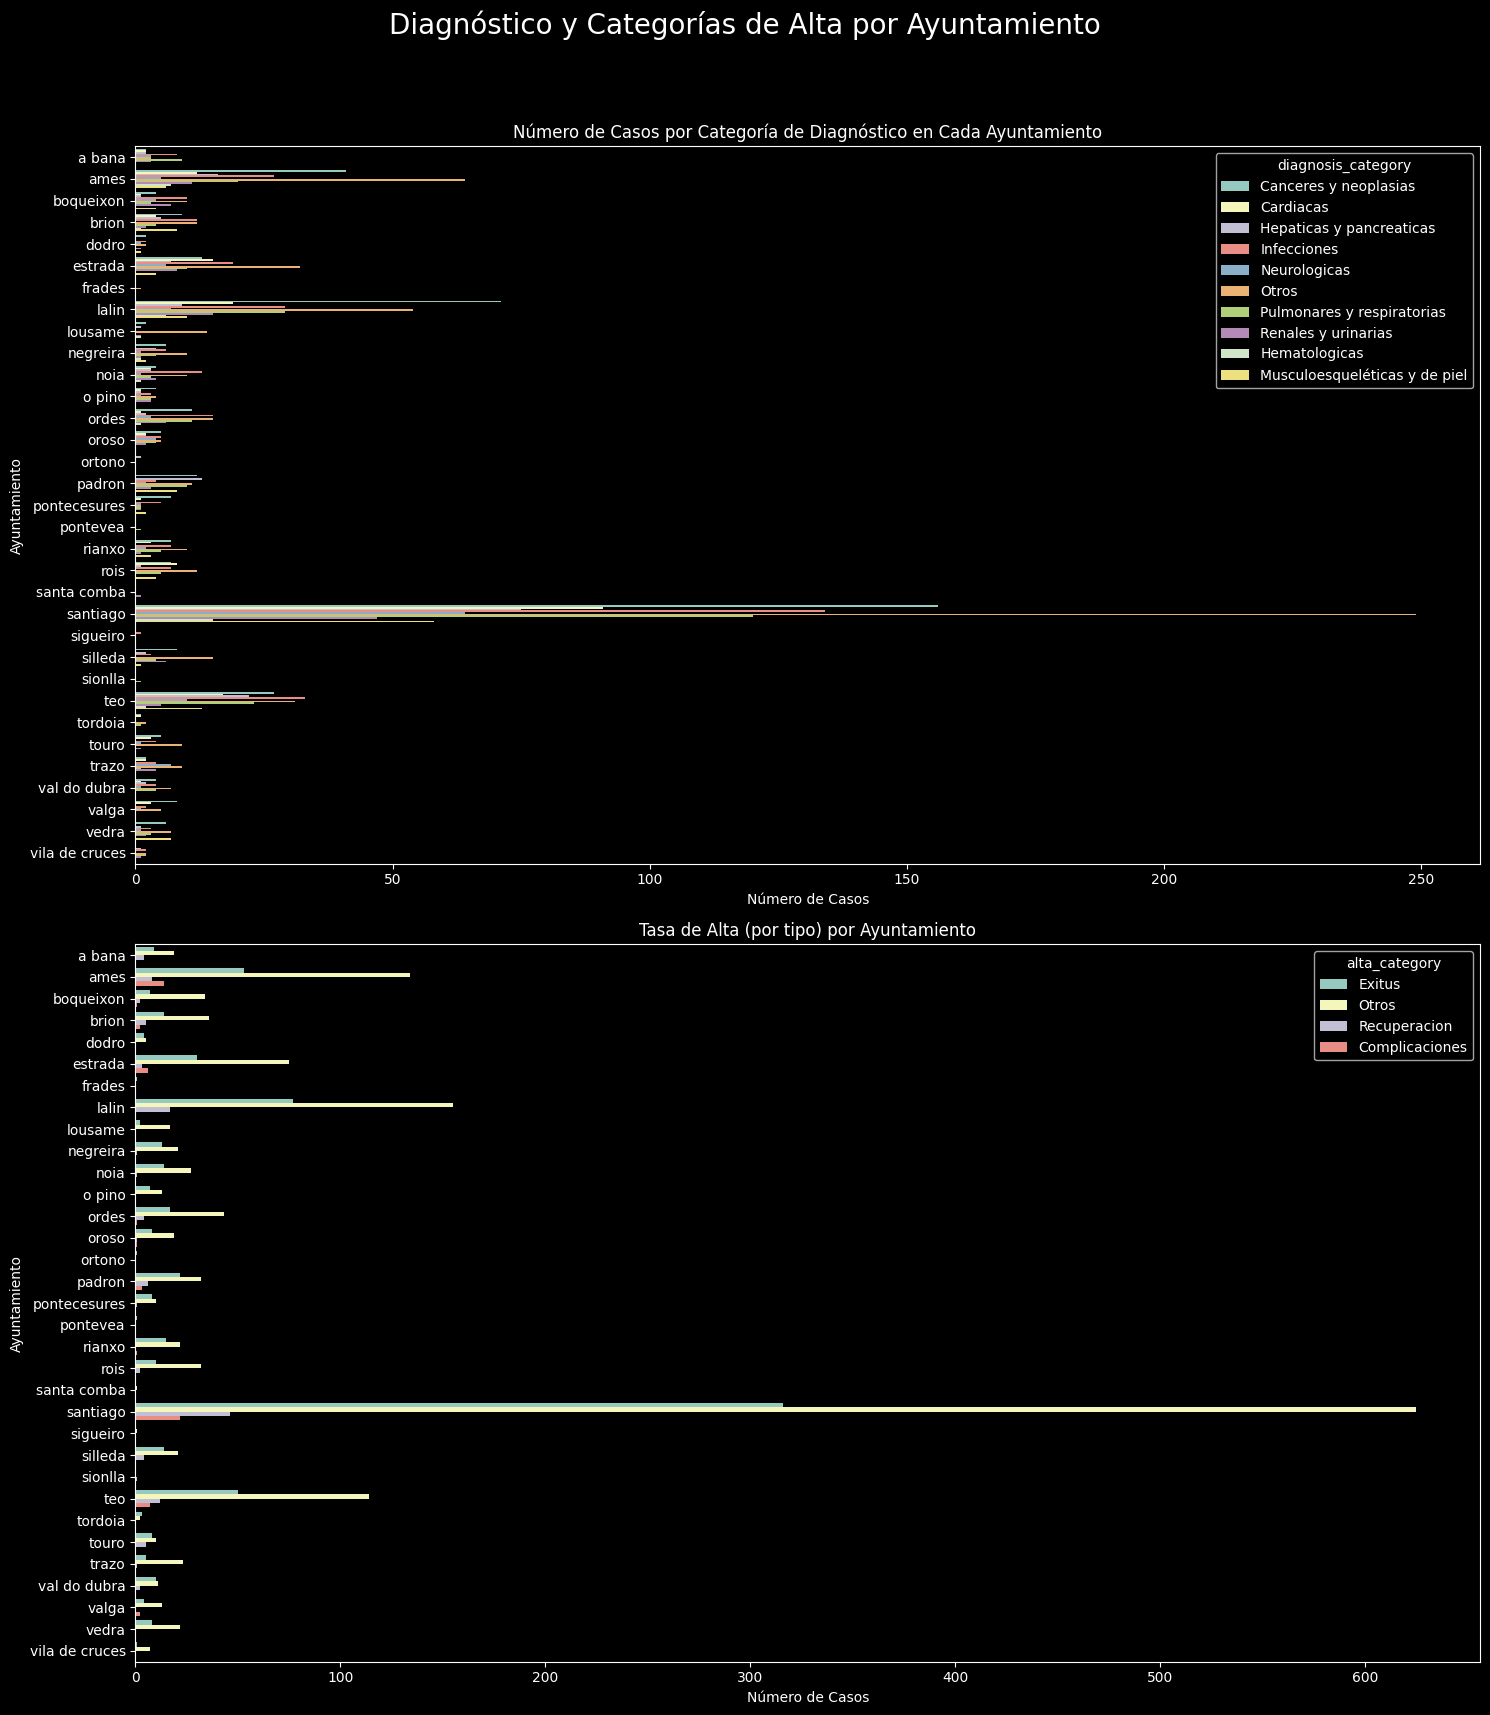

In [21]:
# Create subplots for visualizing diagnosis and alta categories by ayuntamiento
fig, axes = plt.subplots(2, 1, figsize=(15, 18))
fig.suptitle('Diagnóstico y Categorías de Alta por Ayuntamiento', fontsize=20)

# Plotting diagnosis categories
sns.barplot(x='count', y='ayuntamiento', hue='diagnosis_category', data=diagnosis_by_ayuntamiento, ax=axes[0])
axes[0].set_title('Número de Casos por Categoría de Diagnóstico en Cada Ayuntamiento')
axes[0].set_xlabel('Número de Casos')
axes[0].set_ylabel('Ayuntamiento')

# Plotting alta categories
sns.barplot(x='count', y='ayuntamiento', hue='alta_category', data=alta_by_ayuntamiento, ax=axes[1])
axes[1].set_title('Tasa de Alta (por tipo) por Ayuntamiento')
axes[1].set_xlabel('Número de Casos')
axes[1].set_ylabel('Ayuntamiento')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


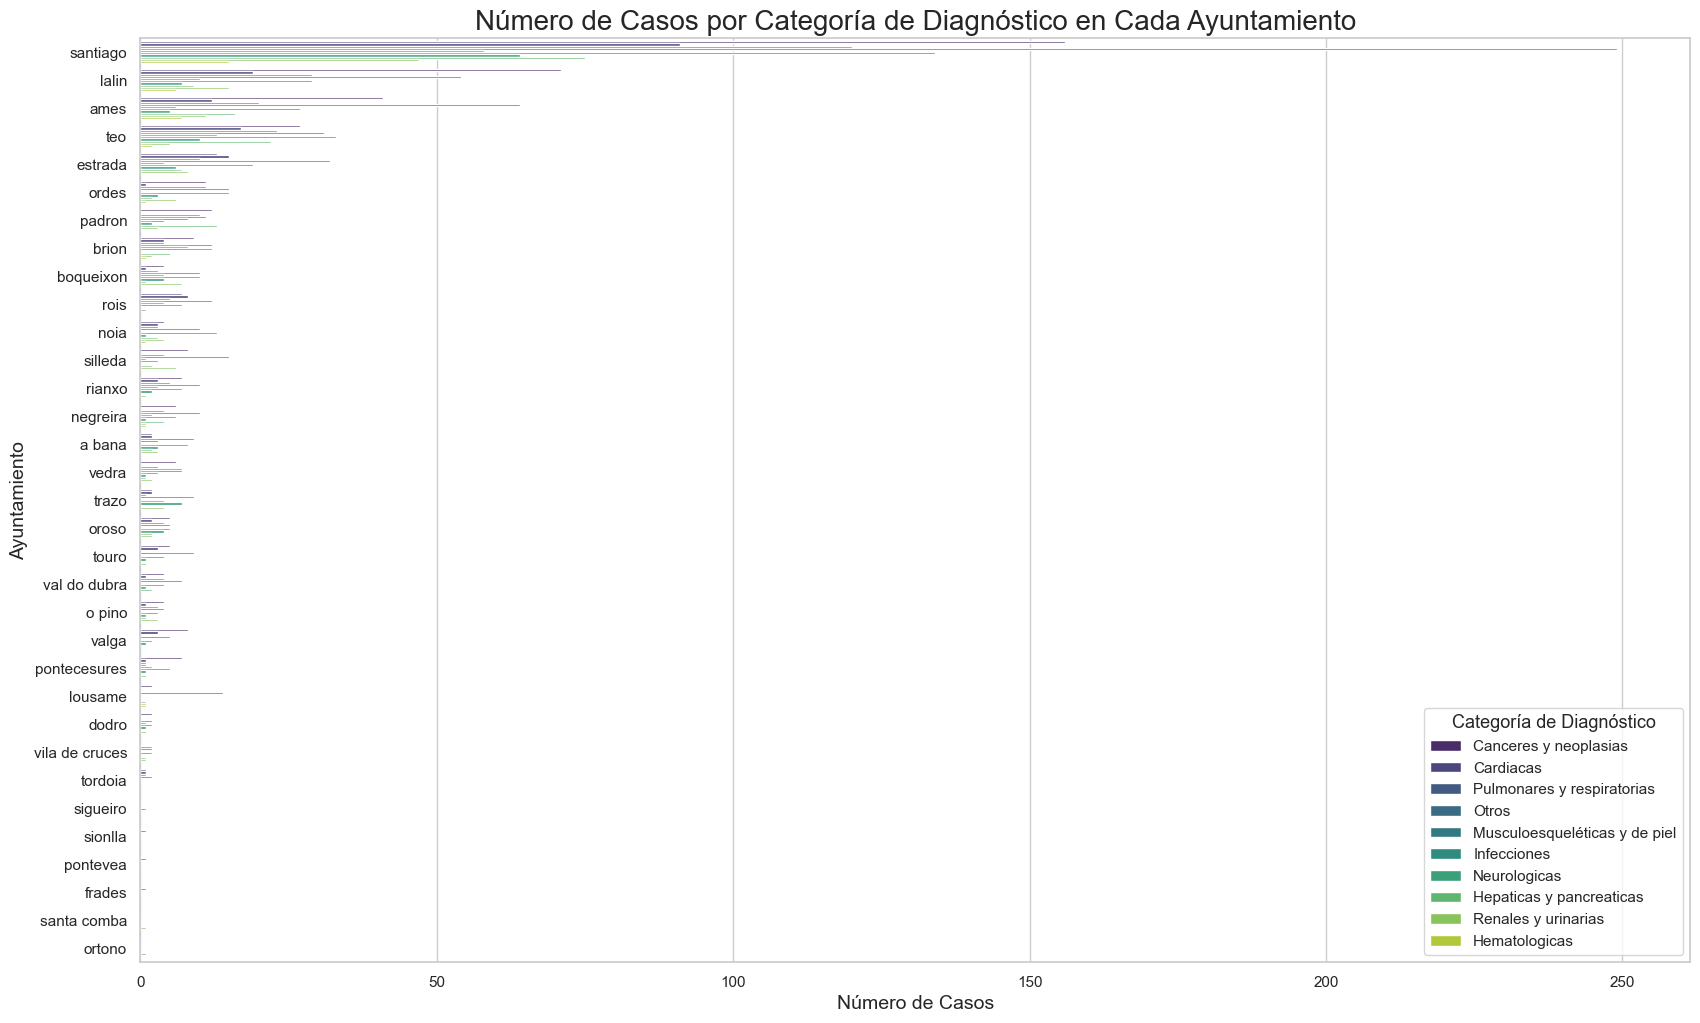

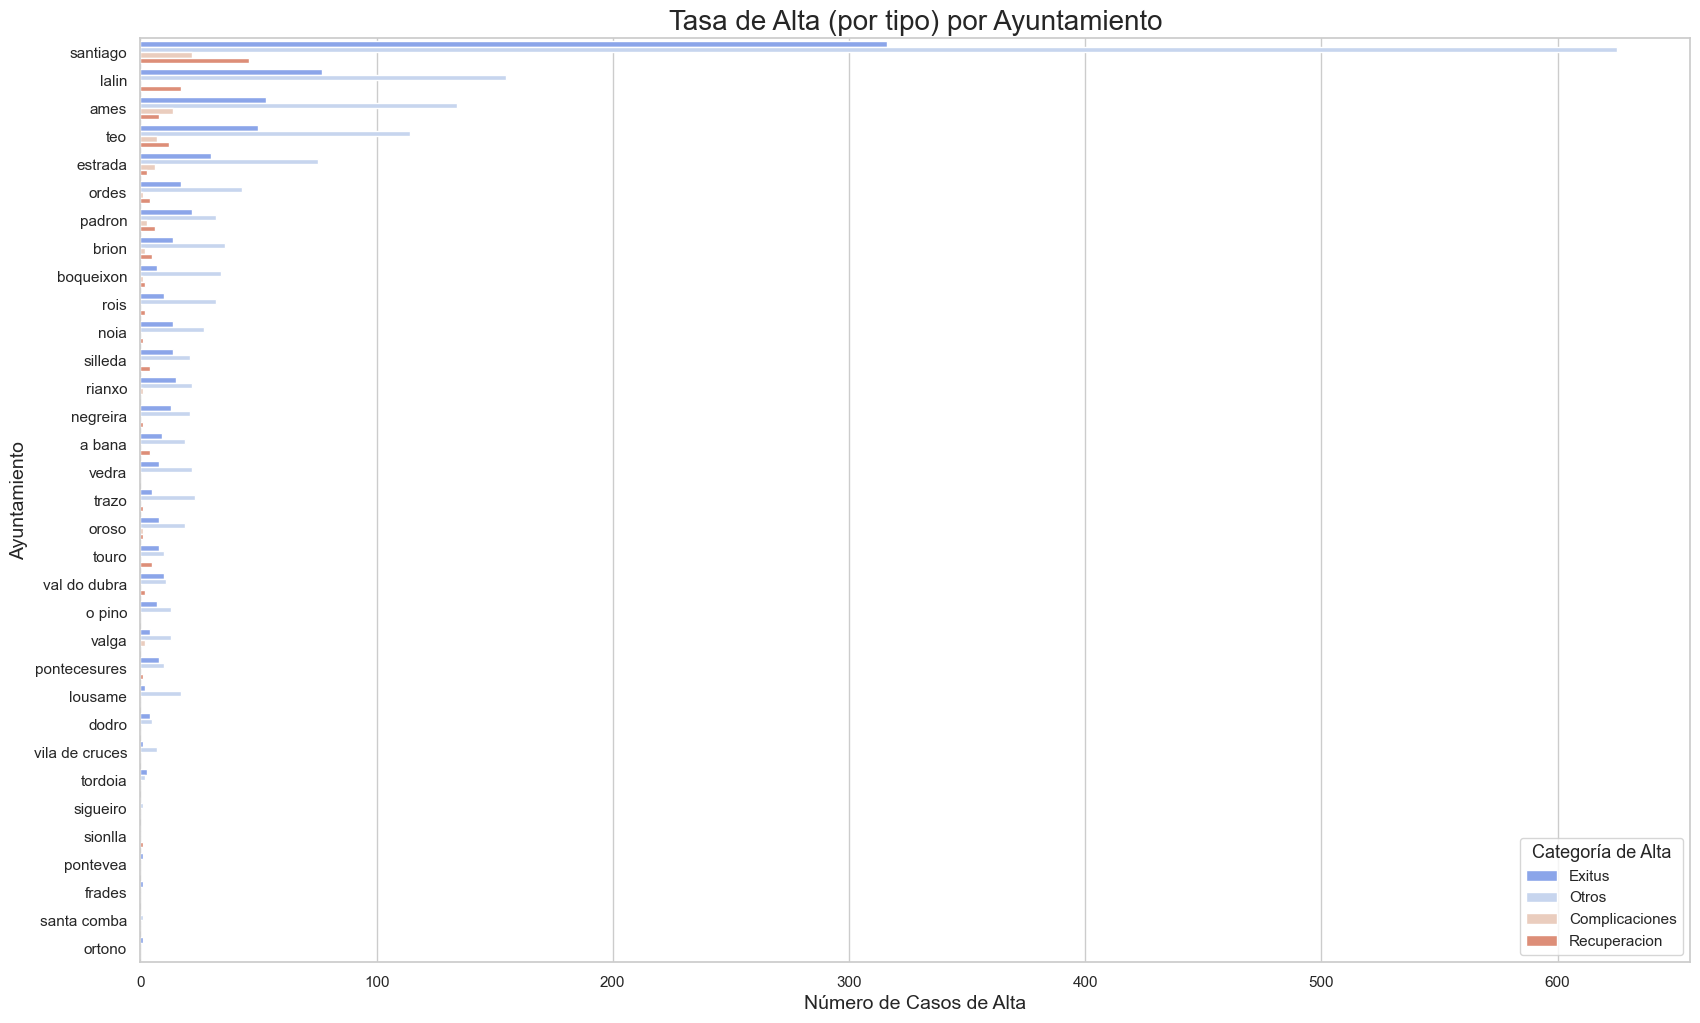

In [29]:
# Replotting the data with better visibility and annotations

# Number of Cases by Diagnosis Category in Each Ayuntamiento
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
sns.countplot(data=df_geo, y='ayuntamiento', hue='diagnosis_category', palette='viridis', order=df_geo['ayuntamiento'].value_counts().index)
plt.title('Número de Casos por Categoría de Diagnóstico en Cada Ayuntamiento', fontsize=20)
plt.xlabel('Número de Casos', fontsize=14)
plt.ylabel('Ayuntamiento', fontsize=14)
plt.legend(title='Categoría de Diagnóstico', title_fontsize='13', loc='lower right')
plt.show()

# Rate of Alta (by type) in Each Ayuntamiento
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
sns.countplot(data=df_geo, y='ayuntamiento', hue='alta_category', palette='coolwarm', order=df_geo['ayuntamiento'].value_counts().index)
plt.title('Tasa de Alta (por tipo) por Ayuntamiento', fontsize=20)
plt.xlabel('Número de Casos de Alta', fontsize=14)
plt.ylabel('Ayuntamiento', fontsize=14)
plt.legend(title='Categoría de Alta', title_fontsize='13', loc='lower right')
plt.show()


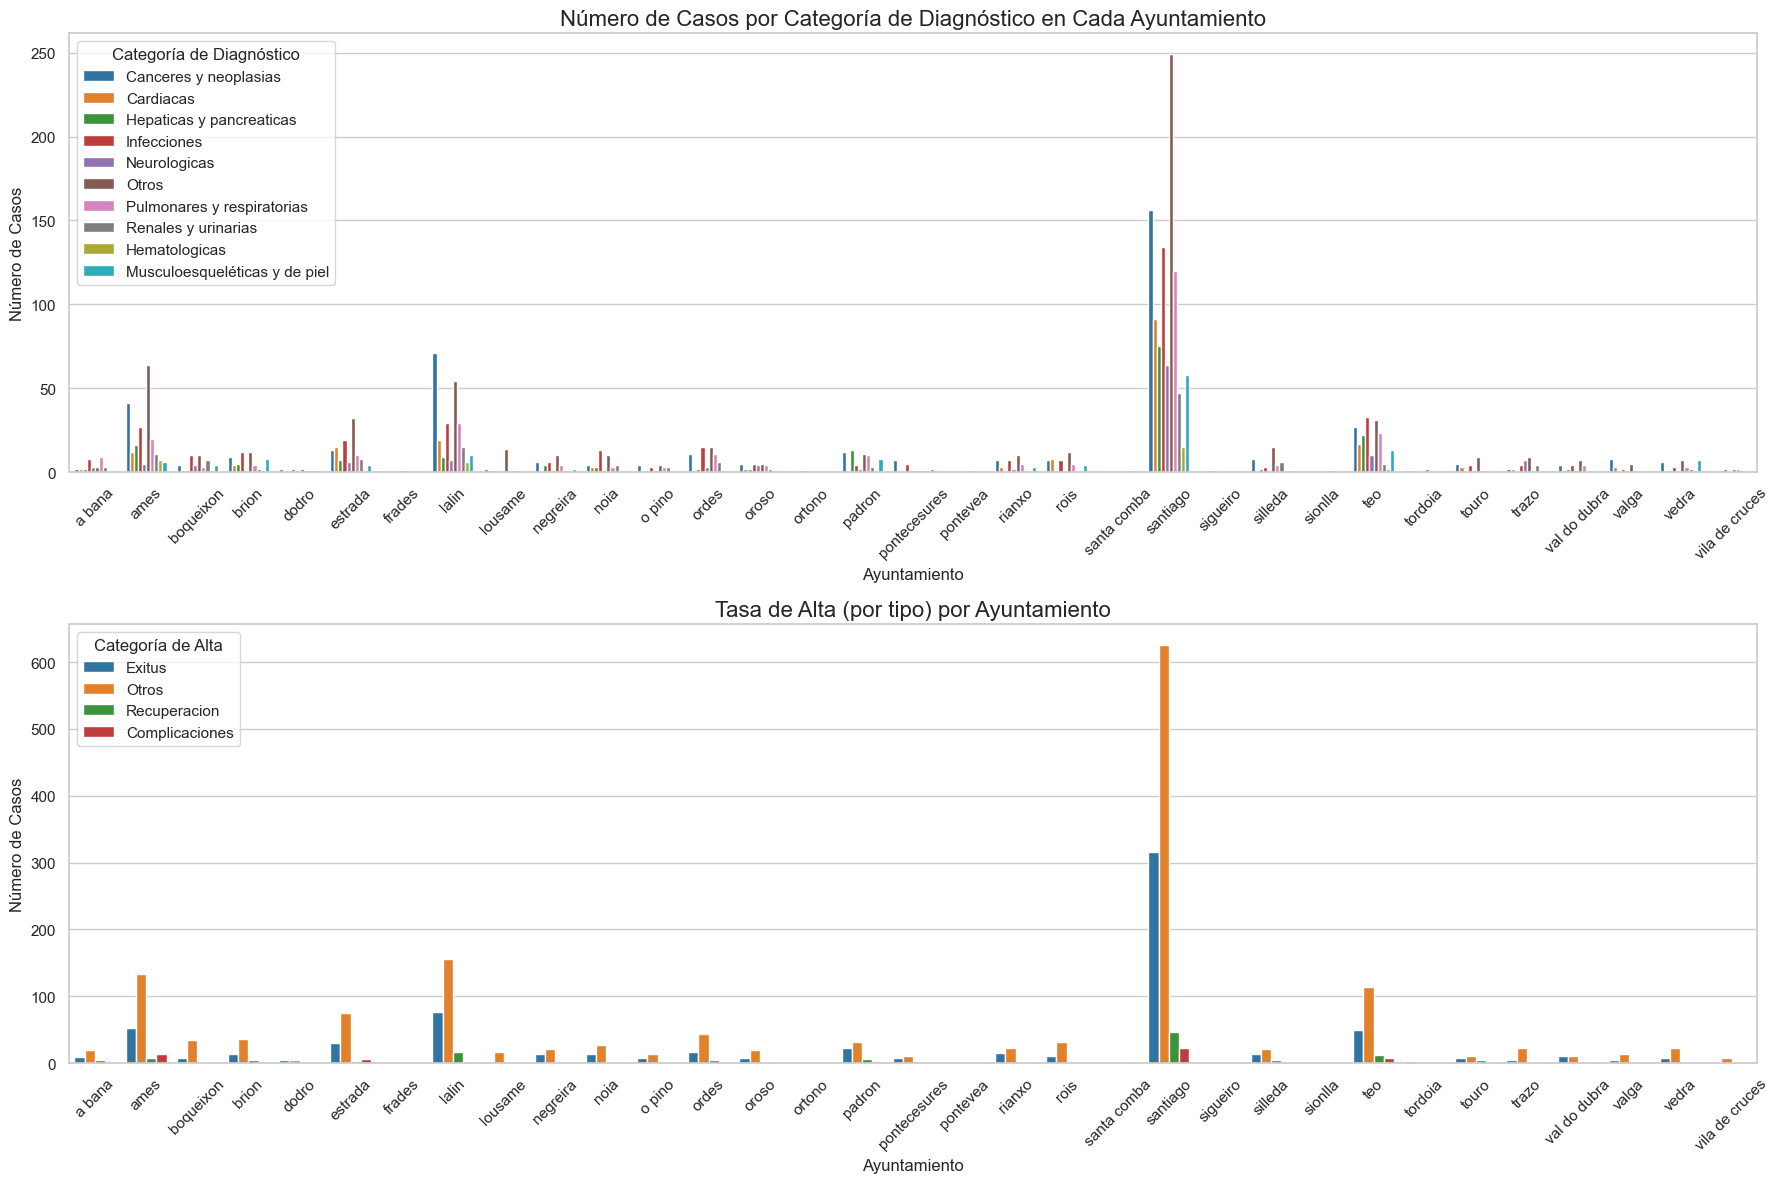

In [30]:
# Re-plotting the data to make the graphs more professional and easier to interpret
plt.figure(figsize=(18, 12))

# Number of Cases by Diagnosis Category in Each Ayuntamiento
plt.subplot(2, 1, 1)
sns.barplot(x='ayuntamiento', y='count', hue='diagnosis_category', data=diagnosis_by_ayuntamiento, palette='tab10')
plt.title('Número de Casos por Categoría de Diagnóstico en Cada Ayuntamiento', fontsize=16)
plt.xlabel('Ayuntamiento')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Diagnóstico')

# Discharge Rate (by type) by Ayuntamiento
plt.subplot(2, 1, 2)
sns.barplot(x='ayuntamiento', y='count', hue='alta_category', data=alta_by_ayuntamiento, palette='tab10')
plt.title('Tasa de Alta (por tipo) por Ayuntamiento', fontsize=16)
plt.xlabel('Ayuntamiento')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Alta')

plt.tight_layout()
plt.show()


### Insights:

1. **Número de Casos por Categoría de Diagnóstico en Cada Ayuntamiento**: Podemos ver que las categorías de diagnóstico varían significativamente entre los diferentes ayuntamientos. Por ejemplo, 'Santiago' tiene una alta incidencia de casos en casi todas las categorías de diagnóstico, lo que es esperado dado que es un área más grande.

2. **Tasa de Alta (por tipo) por Ayuntamiento**: 'Santiago' muestra una diversidad en las categorías de alta, lo que podría indicar una efectividad más amplia del servicio en esa área. 

Estas visualizaciones ofrecen una buena base para futuras investigaciones y podrían ser útiles para la toma de decisiones en la administración del servicio de hospitalización a domicilio (HADO). ¿Hay algo más en lo que pueda asistirte?

>Estas visualizaciones pueden ofrecer insights valiosos para la planificación de servicios y recursos, así como para futuras investigaciones y mejoras en el servicio de HADO.

In [33]:
# Re-load the dataset to capture any changes

# Generate insights for the top ayuntamientos based on the visualizations
diagnosis_by_ayuntamiento = df_geo.groupby(['ayuntamiento', 'diagnosis_category']).size().reset_index(name='count')
alta_by_ayuntamiento = df_geo.groupby(['ayuntamiento', 'alta_category']).size().reset_index(name='count')

# Sort and get the top 3 ayuntamientos by number of cases for each diagnosis category
top_diagnosis_by_ayuntamiento = diagnosis_by_ayuntamiento.sort_values(['diagnosis_category', 'count'], ascending=[True, False])
top_diagnosis_by_ayuntamiento = top_diagnosis_by_ayuntamiento.groupby('diagnosis_category').head(3)

# Sort and get the top 3 ayuntamientos by number of cases for each alta category
top_alta_by_ayuntamiento = alta_by_ayuntamiento.sort_values(['alta_category', 'count'], ascending=[True, False])
top_alta_by_ayuntamiento = top_alta_by_ayuntamiento.groupby('alta_category').head(3)

top_diagnosis_by_ayuntamiento, top_alta_by_ayuntamiento


(    ayuntamiento             diagnosis_category  count
 144     santiago          Canceres y neoplasias    156
 52         lalin          Canceres y neoplasias     71
 8           ames          Canceres y neoplasias     41
 145     santiago                      Cardiacas     91
 53         lalin                      Cardiacas     19
 164          teo                      Cardiacas     17
 146     santiago                  Hematologicas     15
 10          ames                  Hematologicas      7
 54         lalin                  Hematologicas      6
 147     santiago       Hepaticas y pancreaticas     75
 166          teo       Hepaticas y pancreaticas     22
 11          ames       Hepaticas y pancreaticas     16
 148     santiago                    Infecciones    134
 167          teo                    Infecciones     33
 56         lalin                    Infecciones     29
 149     santiago  Musculoesqueléticas y de piel     58
 168          teo  Musculoesqueléticas y de piel

### Top Insights por Ayuntamiento

#### Diagnóstico más común por Ayuntamiento:

1. **Cánceres y neoplasias**: 
    - Santiago: 156 casos
    - Lalín: 71 casos
    - Ames: 41 casos
    
2. **Cardiacas**: 
    - Santiago: 91 casos
    - Lalín: 19 casos
    - Teo: 17 casos

3. **Hematológicas**: 
    - Santiago: 15 casos
    - Ames: 7 casos
    - Lalín: 6 casos
    
4. **Hepáticas y pancreáticas**: 
    - Santiago: 75 casos
    - Teo: 22 casos
    - Ames: 16 casos

5. **Infecciones**: 
    - Santiago: 134 casos
    - Teo: 33 casos
    - Lalín: 29 casos

6. **Musculoesqueléticas y de piel**: 
    - Santiago: 58 casos
    - Teo: 13 casos
    - Lalín: 10 casos
    
7. **Neurológicas**: 
    - Santiago: 64 casos
    - Teo: 10 casos
    - lalín: 7 casos
    
8. **Otros**: 
    - Santiago: 249 casos
    - Ames: 64 casos
    - Lalín: 54 casos

9. **Pulmonares y respiratorias**: 
    - Santiago: 120 casos
    - Lalín: 29 casos
    - Teo: 23 casos

10. **Renales y urinarias**: 
    - Santiago: 47 casos
    - Lalín: 15 casos
    - Ames: 76 casos

#### Tipo de alta más común por Ayuntamiento:

1. **Complicaciones**: 
    - Santiago: 22 casos
    - Ames: 14 casos
    - Teo: 7 casos

2. **Exitus**: 
    - Santiago: 316 casos
    - Lalín: 77 casos
    - Ames: 53 casos
    
3. **Otros**: 
    - Santiago: 625 casos
    - Lalín: 155 casos
    - Ames: 134 casos
    
4. **Recuperación**: 
    - Santiago: 46 casos
    - Lalín: 17 casos
    - Teo: 12 casos

>Estos insights pueden ayudar a entender las necesidades específicas de salud en diferentes áreas geográficas, lo cual es fundamental para una planificación efectiva de los servicios de salud.

In [39]:
import requests
import pandas as pd

# Tu DataFrame original
# df = pd.read_csv('hado_geo.csv')

# URL que contiene el JSON
url = "https://servizos.meteogalicia.gal/rss/observacion/observacionConcellos.action"

# Hacer una solicitud GET para descargar el JSON
response = requests.get(url)
if response.status_code == 200:  # Verificar que la solicitud fue exitosa
    json_data = response.json()  # Parsear el JSON

    # Convertir el JSON a DataFrame
    df_json = pd.DataFrame(json_data['listaObservacionConcellos'])
    
    # Unir los dos DataFrames basándose en la columna de ayuntamiento
    df_merged = pd.merge(df_geo, df_json, left_on='ayuntamiento', right_on='nomeConcello', how='left')
    
    # Ahora, df_merged debería tener las columnas adicionales del JSON
else:
    print("Error al obtener los datos.")

In [42]:
df_json.head()

,dataLocal,dataUTC,icoEstadoCeo,icoVento,idConcello,nomeConcello,sensacionTermica,temperatura
0,2023-09-04T21:38:00,2023-09-04T19:38:00,205,304,15007,A Baña,17.3,17.3
1,2023-09-04T21:38:00,2023-09-04T19:38:00,205,304,32014,A Bola,18.5,18.5
2,2023-09-04T21:38:00,2023-09-04T19:38:00,205,312,36009,A Cañiza,15.7,15.7
3,2023-09-04T21:38:00,2023-09-04T19:38:00,205,300,15018,A Capela,18.7,18.7
4,2023-09-04T21:38:00,2023-09-04T19:38:00,205,302,15030,A Coruña,15.9,20.0


In [41]:
df_merged.isnull().sum()

h_procedencia                    0
hospital_category                0
s_procedencia                    0
procedencia_category             0
diagnostico                      0
diagnosis_category               0
motivo_ing                       0
ingreso_category                 0
motivo_alta                      0
alta_category                    0
fecha_alta                       0
ap                               0
n_estancias                      0
n_visitas                        0
paliativo_onc_noc                0
paliativo_no_onc_noc             0
fiebre                           0
disnea                           0
dolor                            0
delirium                         0
sedacion                         0
p_terminal                       0
agonia                           0
ast_anorx                        0
cronico_reag                     0
trato_antibiotico                0
transfusion                      0
paracentesis                     0
agudo_estable       

In [34]:
import geopandas as gpd

galicia_geo = gpd.read_file('path/to/galicia.geojson')

[09/04/23 21:34:32] ERROR    path/to/galicia.geojson: No such file or directory                   collection.py:243

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in fiona.ogrext.gdal_open_vector:136                                                             │
│                                                                                                  │
│ in fiona._err.exc_wrap_pointer:291                                                               │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
CPLE_OpenFailedError: path/to/galicia.geojson: No such file or directory

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 import geopandas as gpd                                                                      │
│   2                                                                                              │
│ ❱ 3 galicia_geo = gpd.read_file('path/to/galicia.geojson')                                       │
│   4                                                                                              │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\geopandas\io\file.py:281 in _read_file         │
│                                                                                                  │
│   278 │   │   else:                                                                              │
│   279 │   │   │   path_or_bytes = filename                                                       │
│   280 │   │                                                                                      │
│ ❱ 281 │   │   return _read_file_fiona(                                                           │
│   282 │   │   │   path_or_bytes, from_bytes, bbox=bbox, mask=mask, rows=rows, **kwargs           │
│   283 │   │   )                                                                                  │
│   284                                                                                            │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\geopandas\io\file.py:322 in _read_file_fiona   │
│                                                                                                  │
│   319 │   │   reader = fiona.open                                                                │
│   320 │                                                                                          │
│   321 │   with fiona_env():                                                                      │
│ ❱ 322 │   │   with reader(path_or_bytes, **kwargs) as features:                                  │
│   323 │   │   │   crs = features.crs_wkt                                                         │
│   324 │   │   │   # attempt to get EPSG code                                                     │
│   325 │   │   │   try:                                                                           │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\fiona\env.py:457 in wrapper                    │
│                                                                                                  │
│   454 │   │   │  

In [ ]:
merged = galicia_geo.set_index('ayuntamiento').join(df_geo.set_index('ayuntamiento'))


In [ ]:
import plotly.express as px

fig = px.choropleth(merged, 
                    geojson=merged.geometry, 
                    locations=merged.index, 
                    color='column_to_visualize',
                    hover_name='ayuntamiento',
                    scope='europe')

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [12]:
df_grouped = df_geo.groupby(['ayuntamiento', 'year']).agg({
    'n_visitas': ['mean', 'sum'],
    'n_estancias': ['mean', 'sum'],
    'ps_ecog': 'mean',
    'barthel': 'mean',
    'gds_fast': 'mean',
    'eva_ing': 'mean'
}).reset_index()

In [13]:
df_grouped

ayuntamiento  year  n_visitas      n_estancias          ps_ecog  \
                               mean  sum        mean   sum       mean   
0           a bana  2020   3.625000   29    8.500000    68  13.375000   
1           a bana  2021  10.714286   75   21.142857   148   5.714286   
2           a bana  2022   6.000000  102   16.352941   278  15.117647   
3             ames  2020   6.081967  371   14.262295   870  25.278689   
4             ames  2021   5.901408  419   16.478873  1170  15.126761   
..             ...   ...        ...  ...         ...   ...        ...   
75           valga  2022   7.000000   63   12.888889   116   8.222222   
76           vedra  2020   7.727273   85   19.909091   219  22.000000   
77           vedra  2021   9.181818  101   18.454545   203  16.545455   
78           vedra  2022   3.875000   31   13.125000   105  15.875000   
79  vila de cruces  2022   6.375000   51   10.000000    80  19.250000   

       barthel   gds_fast eva_ing  
          mean       mean    mean  
0   386.250000   0.000000     0.0  
1   155.714286  27.142857     0.0  
2   150.000000  12.352941     0.0  
3   315.573770   4.770492     0.0  
4   178.732394   6.112676     0.0  
..         ...        ...     ...  
75  480.000000   0.000000     0.0  
76  278.181818   2.727273     0.0  
77  193.636364   7.272727     0.0  
78  355.000000   9.625000     0.0  
79  355.000000  14.625000     0.0  

[80 rows x 10 columns]

In [18]:
import pandas as pd
# Crear tablas dinámicas para cada una de las categorías de interés
# en relación con las columnas "ayuntamiento" y "year"

# Tabla dinámica para la categoría "alta"
pivot_alta = pd.pivot_table(df_geo, index=['ayuntamiento', 'year'], columns=['alta_category'], 
                            values='hospital_category', aggfunc='count', fill_value=0)

# Tabla dinámica para la categoría "diagnóstico"
pivot_diagnostico = pd.pivot_table(df_geo, index=['ayuntamiento', 'year'], columns=['diagnosis_category'], 
                                   values='hospital_category', aggfunc='count', fill_value=0)

# Tabla dinámica para la categoría "motivo de ingreso"
pivot_motivo_ing = pd.pivot_table(df_geo, index=['ayuntamiento', 'year'], columns=['ingreso_category'], 
                                  values='hospital_category', aggfunc='count', fill_value=0)

# Mostrar las primeras filas de cada tabla dinámica
pivot_alta.head(), pivot_diagnostico.head(), pivot_motivo_ing.head()


(alta_category      Complicaciones  Exitus  Otros  Recuperacion
 ayuntamiento year                                             
 a bana       2020               0       4      4             0
              2021               0       2      5             0
              2022               0       3     10             4
 ames         2020               5      17     36             3
              2021               8      27     35             1,
 diagnosis_category  Canceres y neoplasias  Cardiacas  Hematologicas  \
 ayuntamiento year                                                     
 a bana       2020                       0          0              0   
              2021                       0          1              0   
              2022                       2          1              0   
 ames         2020                      16          5              2   
              2021                      19          5              1   
 
 diagnosis_category  Hepaticas y pancreaticas

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas\core\indexes\base.py:3802 in get_loc    │
│                                                                                                  │
│   3799 │   │   │   │   )                                                                         │
│   3800 │   │   │   casted_key = self._maybe_cast_indexer(key)                                    │
│   3801 │   │   │   try:                                                                          │
│ ❱ 3802 │   │   │   │   return self._engine.get_loc(casted_key)                                   │
│   3803 │   │   │   except KeyError as err:                                                       │
│   3804 │   │   │   │   raise KeyError(key) from err                                              │
│   3805 │   │   │   except TypeError:                                                             │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:138                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:165                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5745                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:5753                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'y'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:16                                                                                   │
│                                                                                                  │
│   13 │   plt.show()                                                                              │
│   14                                                                                             │
│   15 # Graficar tendencias temporales para cada tabla dinámica                                   │
│ ❱ 16 plot_trends(pivot_alta, 'Tendencias Temporales para Categorías de Alta')                    │
│   17 plot_trends(pivot_diagnostico, 'Tendencias Temporales para Categorías de Diagnóstico')      │
│   18 plot_trends(pivot_motivo_ing, 'Tendencias Temporales para Categorías de Motivo de Ingres    │
│   19                                                                                             │
│                                                                                                  │
│ in plot_trends:7                                                                                 │
│                                                                                                  │
│    4 # Función para graficar tendencias temporales para una tabla dinámica específica            │
│    5 def plot_trends(pivot_table, title):                                                        │
│    6 │   plt.figure(figsize=(20, 10))                                                            │
│ ❱  7 │   sns.lineplot(data=pivot_table.reset_index(), x='year', hue='ayuntamiento', marker='o    │
│    8 │   plt.title(title)                                                                        │
│    9 │   plt.xlabel('Year')                                                

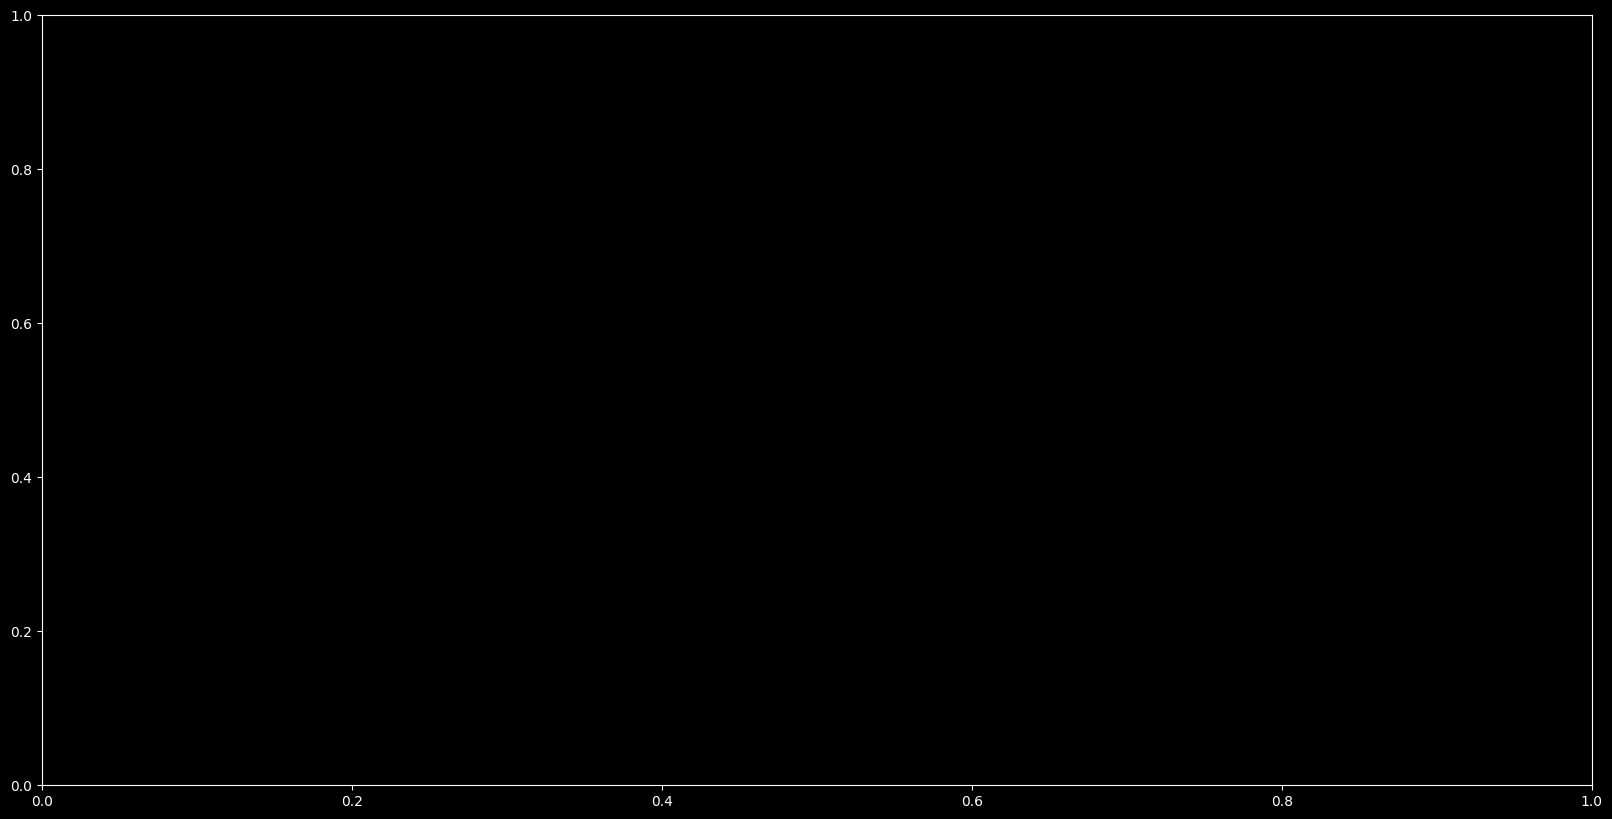

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar tendencias temporales para una tabla dinámica específica
def plot_trends(pivot_table, title):
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=pivot_table.reset_index(), x='year', hue='ayuntamiento', marker='o')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Ayuntamiento', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Graficar tendencias temporales para cada tabla dinámica
plot_trends(pivot_alta, 'Tendencias Temporales para Categorías de Alta')
plot_trends(pivot_diagnostico, 'Tendencias Temporales para Categorías de Diagnóstico')
plot_trends(pivot_motivo_ing, 'Tendencias Temporales para Categorías de Motivo de Ingreso')
